# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np


total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
total_data.shape

(1338, 7)

In [3]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


existe un total de 1338 filas y 7 columnas, no se aprecia que las columnas tengan nulos.

por otra parte, tenemos:

4 carasteristicas numericas y 3 carasteristicas categoricas.

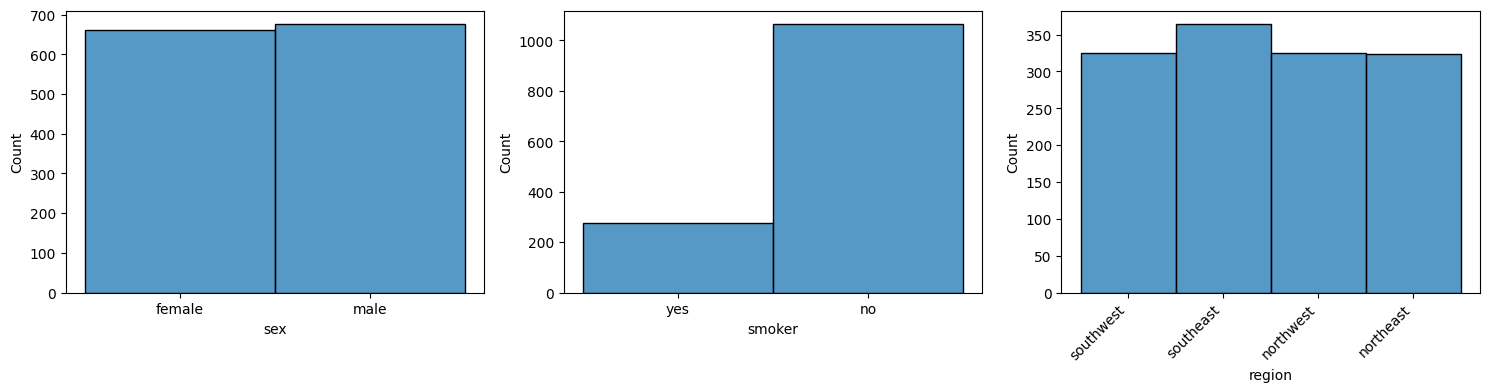

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns


fig, axis = plt.subplots(2, 3, figsize=(15, 7))

# Create Histogram
sns.histplot(ax = axis[0,0], data = total_data, x = "sex")
sns.histplot(ax = axis[0,1], data = total_data, x = "smoker")
sns.histplot(ax = axis[0,2], data = total_data, x = "region")

plt.setp(axis[0,2].get_xticklabels(), rotation=45, ha='right')

fig.delaxes(axis[1, 0])
fig.delaxes(axis[1, 1])
fig.delaxes(axis[1, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

el grafico de la izquierda muestra la distribución de los asegurados por sexo. Podemos ver que hay una cantidad casi igual de hombres y mujeres en el conjunto de datos, esto sugiere que la muestra de datos está bien equilibrada en términos de género, lo que es bueno para evitar sesgos en el análisis.

El grafico del centro muestra una gran diferencia en la cantidad de fumadores y no fumadores. La gran mayoría de los asegurados no son fumadores, esto podría ser un factor importante en el costo del seguro. Es probable que los fumadores tengan costos de seguro más altos debido a los riesgos de salud asociados.

El grafico de la derecha muestra la distribución de los asegurados por región. Las cuatro regiones (suroeste, sureste, noroeste y noreste) tienen una representación relativamente similar en el conjunto de datos, al igual que con el sexo, tener una distribución equilibrada por región es bueno para el análisis, ya que evita que los resultados estén sesgados hacia una región en particular.

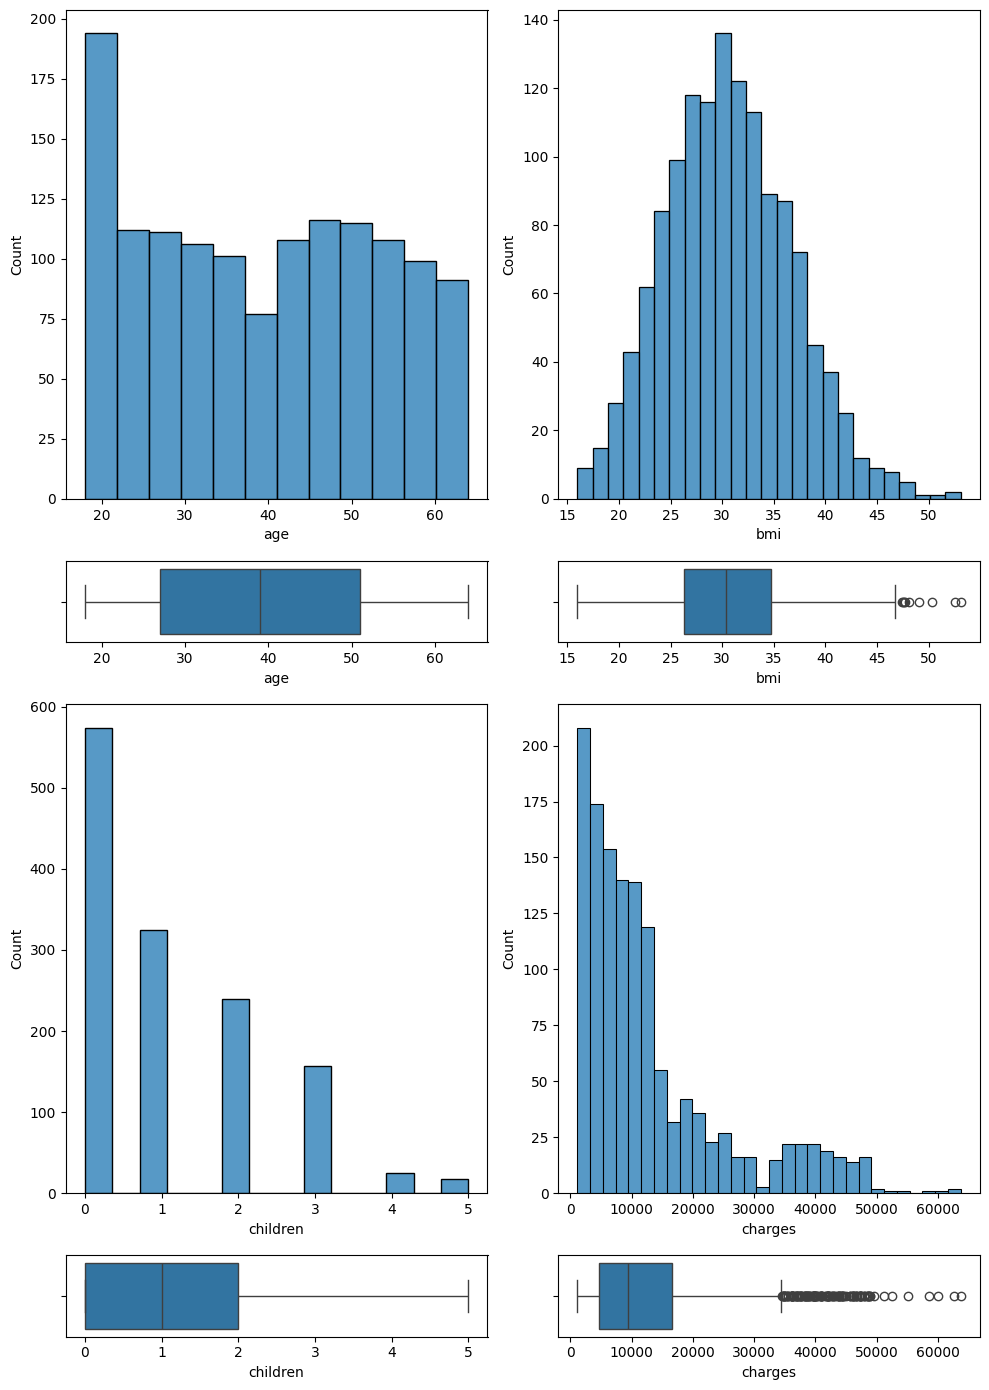

In [5]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1,]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "age")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age")

sns.histplot(ax = axis[0, 1], data = total_data, x = "bmi")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "bmi")

sns.histplot(ax = axis[2, 0], data = total_data, x = "children")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "children")

sns.histplot(ax = axis[2, 1], data = total_data, x = "charges")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "charges")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Analisis de variables multivariante

Analisis numérico-numérico

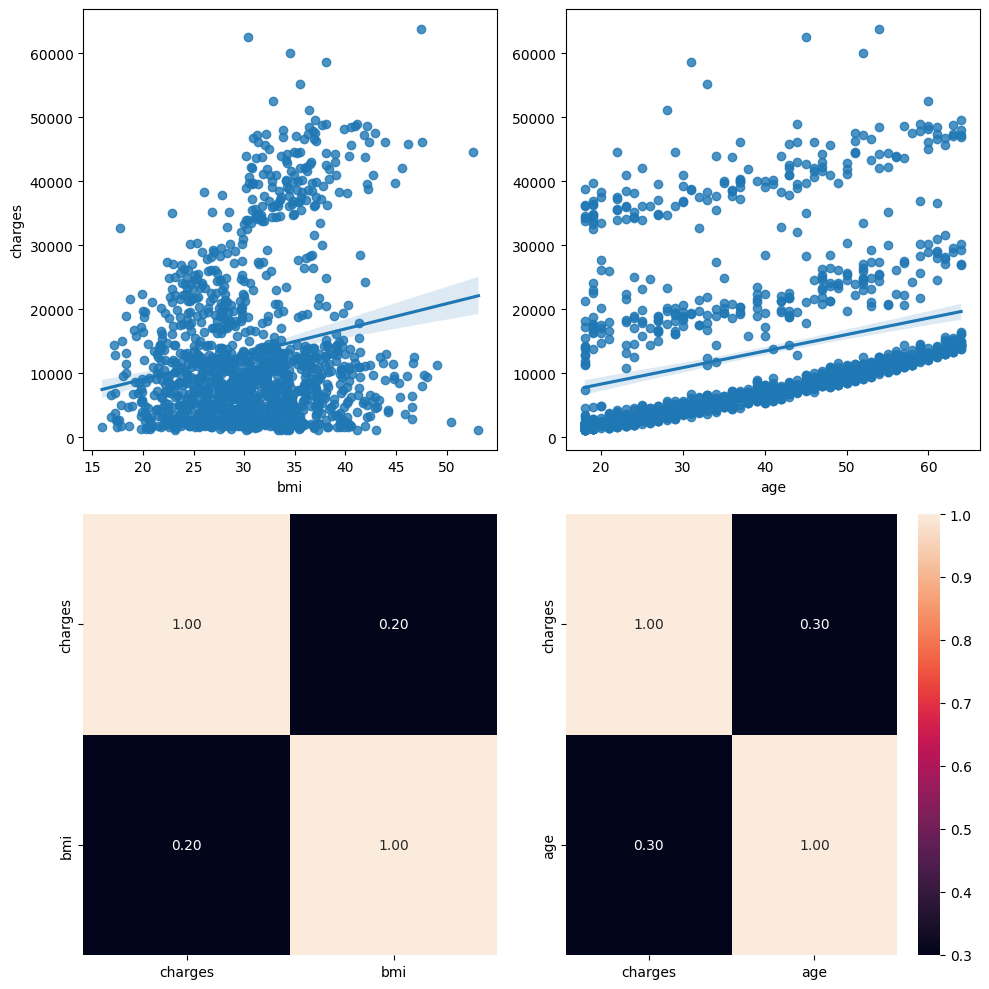

In [6]:
fig, axis = plt.subplots(2, 2, figsize = (10, 10))

sns.regplot(ax = axis[0, 0], data = total_data, x = "bmi", y = "charges")
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "age", y = "charges").set(ylabel = None)
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])





# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Se puede visualizar en las graficas que no existe correlacion entre las variables numericas vitas con respecto a charges

Analisis categorico-categorico

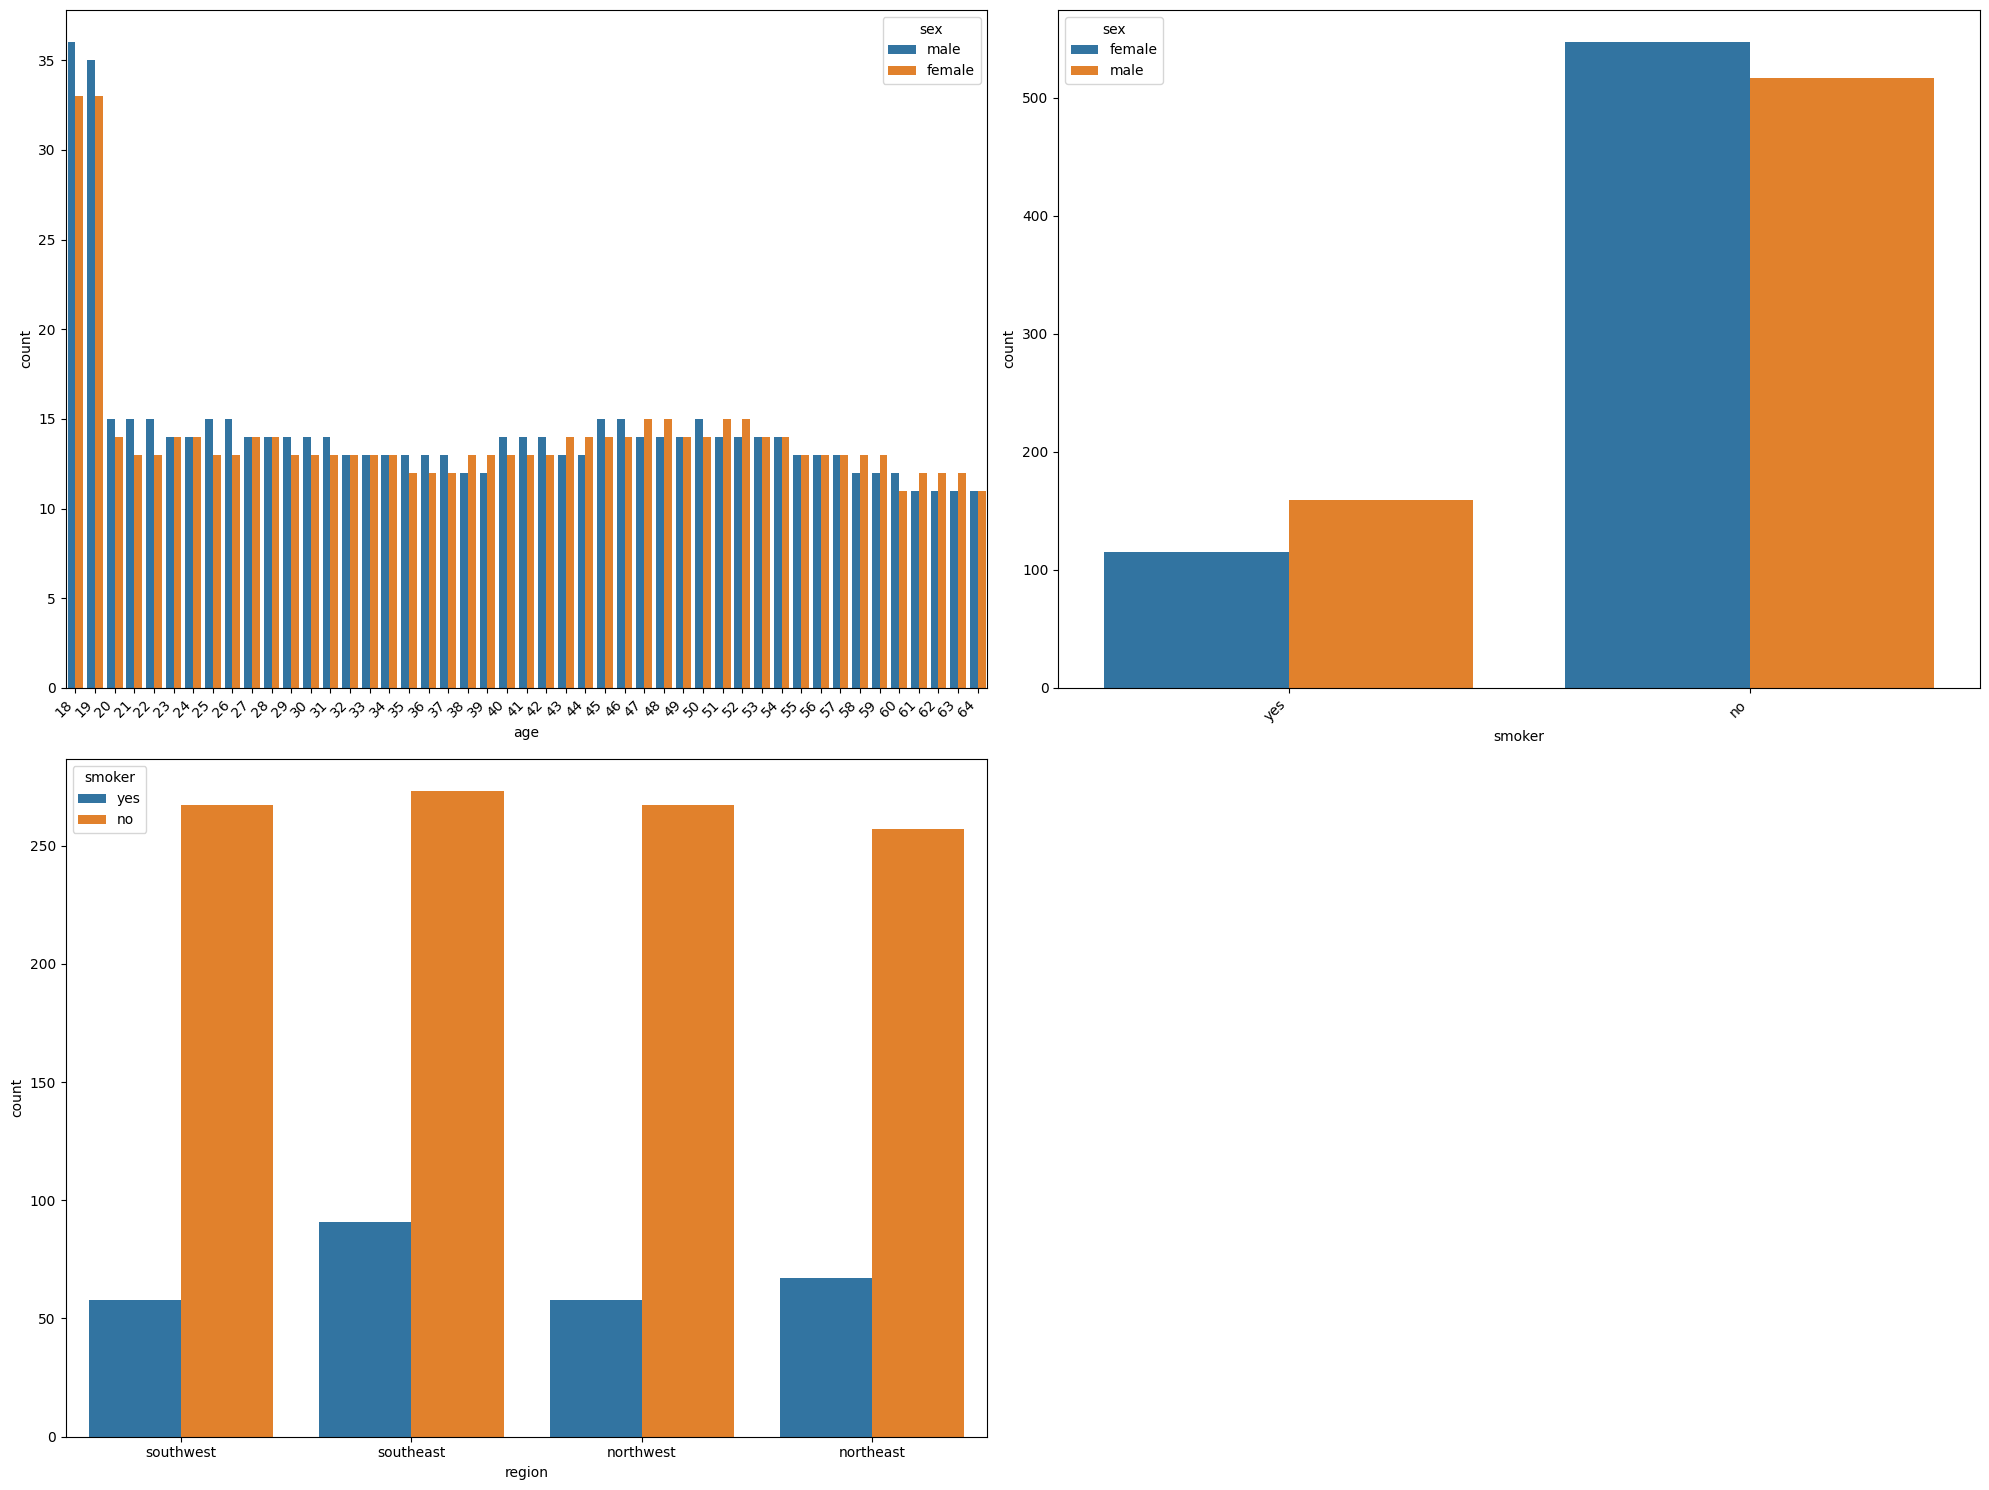

In [7]:
fig, axis = plt.subplots(2, 2, figsize = (20, 15))

sns.countplot(ax = axis[0, 0], data = total_data, x = "age", hue = "sex")
sns.countplot(ax = axis[0, 1], data = total_data, x = "smoker", hue = "sex")
sns.countplot(ax = axis[1, 0], data = total_data, x = "region", hue = "smoker")

plt.setp(axis[0,0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axis[0,1].get_xticklabels(), rotation=45, ha='right')


fig.delaxes(axis[1, 1])

plt.tight_layout()


plt.show()

En el grafico de la parte izquierda superiro se puede observar que la distribución por edad es bastante uniforme, con un número similar de personas en cada grupo de edad. Además, dentro de cada grupo de edad, la proporción de hombres y mujeres es aproximadamente igual, esto indica que la muestra de datos es representativa en términos de edad y no está sesgada hacia ningún grupo de edad o sexo en particular.

En el grafico de la derecha se puede ver que hay más hombres fumadores que mujeres fumadoras, aunque la diferencia no es muy grande. La gran mayoría de los asegurados, tanto hombres como mujeres, no son fumadores, este gráfico refuerza la idea de que ser fumador es un factor minoritario en este conjunto de datos, pero también muestra una ligera diferencia de género en este hábito.

En el grafico de la parte izquierda inferios se puede observar que la proporción de fumadores y no fumadores es similar en todas las regiones, esto sugiere que la región no es un factor determinante en si una persona es fumadora o no. La prevalencia del tabaquismo es relativamente constante en todo el país.

Combinaciones de la clase con varias predictoras

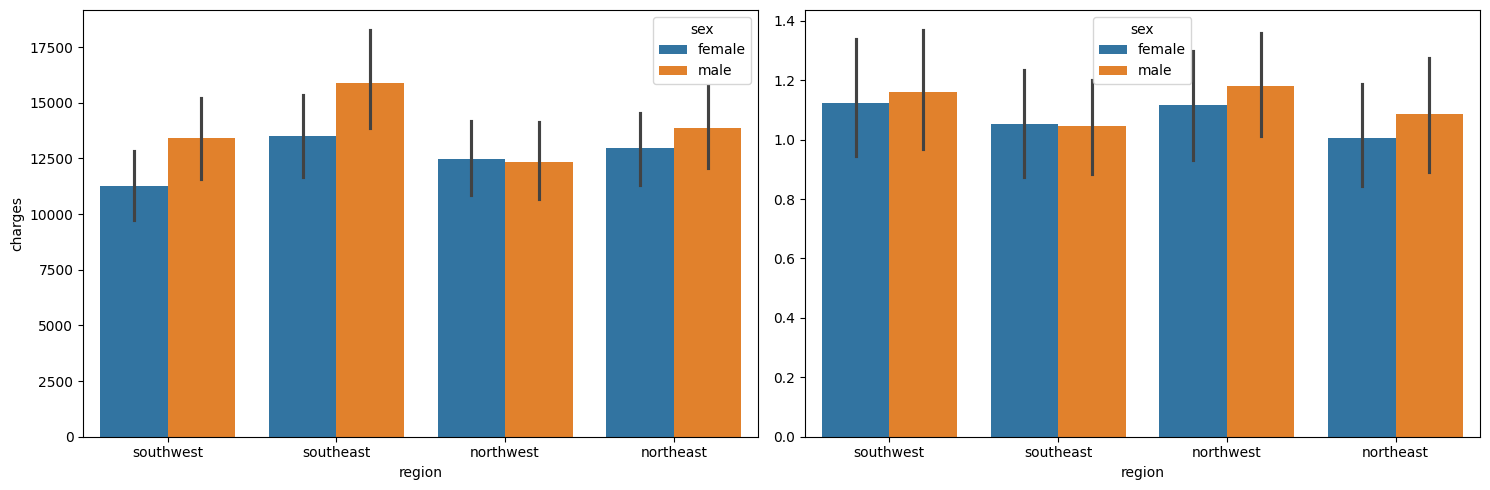

In [8]:
fig, axis = plt.subplots(figsize = (15, 5), ncols = 2)

sns.barplot(ax = axis[0], data = total_data, x = "region", y = "charges", hue = "sex")
sns.barplot(ax = axis[1], data = total_data, x = "region", y = "children", hue = "sex").set(ylabel = None)


plt.tight_layout()

plt.show()

El grafico de la izquierda nos dice que en general, los hombres tienden a tener cargos ligeramente más altos que las mujeres en la mayoría de las regiones, excepto en el noroeste, donde los cargos son muy similares. La región sureste parece tener los cargos más altos tanto para hombres como para mujeres, esto sugiere que tanto la región como el sexo pueden ser factores que influyen en el costo del seguro. La diferencia de costos entre regiones podría deberse a una variedad de factores.

En el grafico de la derecha el número promedio de hijos es bastante similar en todas las regiones y entre hombres y mujeres, generalmente alrededor de uno, a diferencia de los cargos del seguro, el número de hijos no parece variar significativamente por región o sexo. Esto sugiere que el número de hijos es un factor demográfico relativamente consistente en todo el conjunto de datos.

In [9]:
total_data["sex_n"] = pd.factorize(total_data["sex"])[0]
total_data[["sex_n", "sex"]]

,sex_n,sex
0,0,female
1,1,male
2,1,male
3,1,male
4,1,male
...,...,...
1333,1,male
1334,0,female
1335,0,female
1336,0,female


In [10]:
total_data[["sex_n", "sex"]].drop_duplicates()

,sex_n,sex
0,0,female
1,1,male


In [11]:
sex_transformation_rules = {row["sex"]: row["sex_n"] for index, row in total_data[["sex_n", "sex"]].dropna().drop_duplicates().iterrows()}
print(sex_transformation_rules)

import json

# Escritura
with open("./sex_transformation_rules.json", "w") as f:
  json.dump(sex_transformation_rules, f)

# Lectura
# ESTO NO NECESITAIS HACERLO AHORA. LO ENTENDEREIS MAS ADELANTE :)
with open("./sex_transformation_rules.json", "r") as f:
  sex_transformation_rules = json.load(f)

import numpy as np

total_data["sex_n"] = total_data["sex"].apply(lambda x: sex_transformation_rules[x] if not pd.isna(x) else np.nan)
total_data

{'female': 0, 'male': 1}


,age,sex,bmi,children,smoker,region,charges,sex_n
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [12]:
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0]
total_data[["smoker_n", "smoker"]]

,smoker_n,smoker
0,0,yes
1,1,no
2,1,no
3,1,no
4,1,no
...,...,...
1333,1,no
1334,1,no
1335,1,no
1336,1,no


In [13]:
total_data[["smoker_n", "smoker"]].drop_duplicates()

,smoker_n,smoker
0,0,yes
1,1,no


In [14]:
smoker_transformation_rules = {row["smoker"]: row["smoker_n"] for index, row in total_data[["smoker_n", "smoker"]].dropna().drop_duplicates().iterrows()}
print(smoker_transformation_rules)

import json

# Escritura
with open("./smoker_transformation_rules.json", "w") as f:
  json.dump(smoker_transformation_rules, f)

# Lectura
# ESTO NO NECESITAIS HACERLO AHORA. LO ENTENDEREIS MAS ADELANTE :)
with open("./smoker_transformation_rules.json", "r") as f:
  smoker_transformation_rules = json.load(f)


total_data["smoker_n"] = total_data["smoker"].apply(lambda x: smoker_transformation_rules[x] if not pd.isna(x) else np.nan)
total_data

{'yes': 0, 'no': 1}


,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1
4,32,male,28.880,0,no,northwest,3866.85520,1,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,1
1335,18,female,36.850,0,no,southeast,1629.83350,0,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1


In [15]:
total_data["region_n"] = pd.factorize(total_data["region"])[0]
total_data[["region_n", "region"]]

,region_n,region
0,0,southwest
1,1,southeast
2,1,southeast
3,2,northwest
4,2,northwest
...,...,...
1333,2,northwest
1334,3,northeast
1335,1,southeast
1336,0,southwest


In [16]:
total_data[["region_n", "region"]].drop_duplicates()

,region_n,region
0,0,southwest
1,1,southeast
3,2,northwest
8,3,northeast


In [17]:
region_transformation_rules = {row["region"]: row["region_n"] for index, row in total_data[["region_n", "region"]].dropna().drop_duplicates().iterrows()}
print(region_transformation_rules)

import json

# Escritura
with open("./region_transformation_rules.json", "w") as f:
  json.dump(region_transformation_rules, f)

# Lectura
# ESTO NO NECESITAIS HACERLO AHORA. LO ENTENDEREIS MAS ADELANTE :)
with open("./region_transformation_rules.json", "r") as f:
  region_transformation_rules = json.load(f)


total_data["region_n"] = total_data["region"].apply(lambda x: region_transformation_rules[x] if not pd.isna(x) else np.nan)
total_data

{'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}


,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0


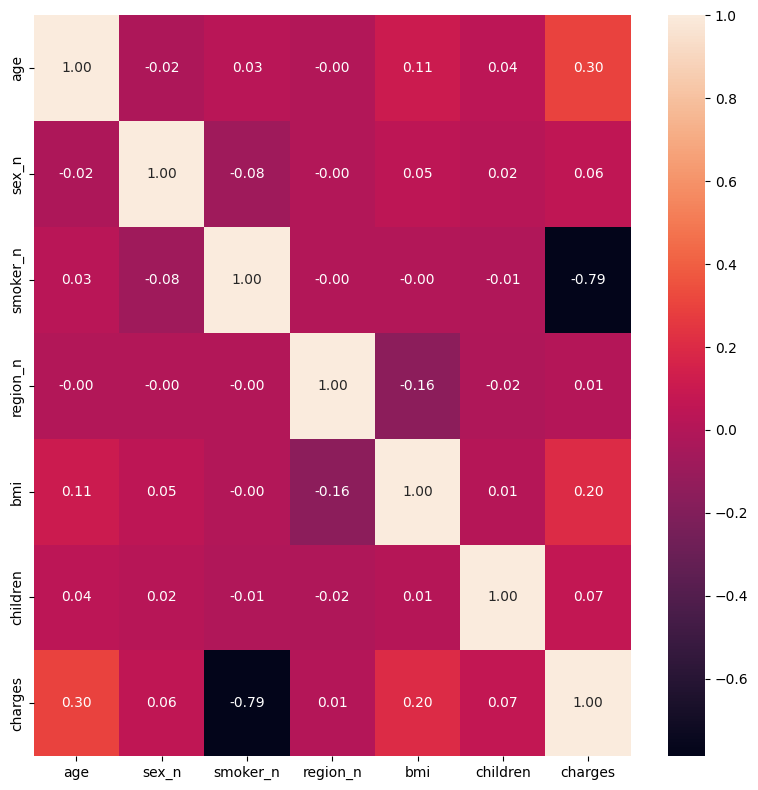

In [18]:
fig, axes = plt.subplots(figsize=(8, 8))

sns.heatmap(total_data[["age", "sex_n", "smoker_n", "region_n", "bmi",	
                        "children", "charges"]].corr(), annot = True, fmt = ".2f")


plt.tight_layout()

# Draw Plot
plt.show()

El analisis del conjunto de datos de seguros medicos revela que, si bien la distribución de los asegurados es equilibrada en términos de sexo y región, el factor más determinante en el costo del seguro es si la persona es fumadora. Los fumadores tienen costos significativamente más altos, un hecho que se ve reforzado por una fuerte correlación negativa en el mapa de calor. La edad y el índice de masa corporal (BMI) también muestran una correlación positiva moderada con los cargos, lo que indica que a mayor edad y mayor IMC, los costos tienden a aumentar. Por el contrario, el sexo, la región y el número de hijos tienen una influencia mucho menor en el costo final del seguro. En resumen, el tabaquismo es el principal impulsor de los costos, seguido por la edad y el BMI.

Ingenieria de caracteristicas

valores atipicos

In [19]:
total_data.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.795217,1.484305
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,1.104885
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


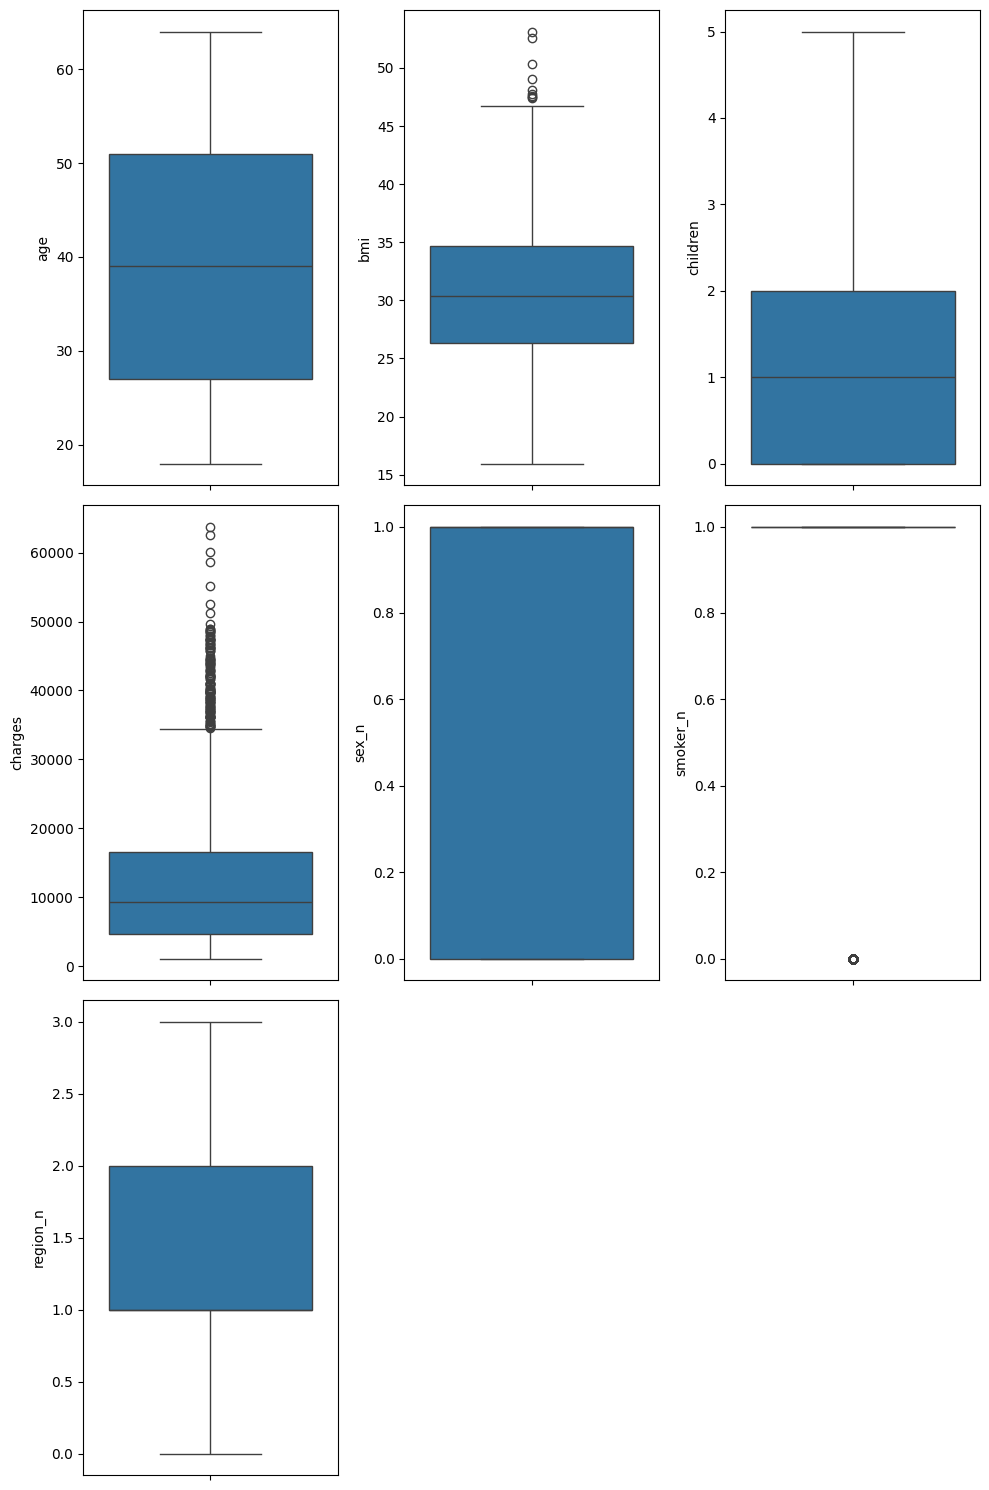

In [20]:
fig, axes = plt.subplots(3, 3, figsize = (10, 15))

sns.boxplot(ax = axes[0, 0], data = total_data, y = "age")
sns.boxplot(ax = axes[0, 1], data = total_data, y = "bmi")
sns.boxplot(ax = axes[0, 2], data = total_data, y = "children")
sns.boxplot(ax = axes[1, 0], data = total_data, y = "charges")
sns.boxplot(ax = axes[1, 1], data = total_data, y = "sex_n")
sns.boxplot(ax = axes[1, 2], data = total_data, y = "smoker_n")
sns.boxplot(ax = axes[2, 0], data = total_data, y = "region_n")
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

plt.tight_layout()

plt.show()

Deteccion de valores atipicos.

In [21]:
data_CON_outliers = total_data.copy()

data_SIN_outliers = total_data.copy()
# Para cada una de las variables con outliers en mi problema, tengo que reemplazar sus valores del DF

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ["bmi", "age", "smoker_n"]:
  data_SIN_outliers, limit_list = replace_outliers_from_column(column, data_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'bmi': [np.float64(13.7), np.float64(47.290000000000006)],
 'age': [18, np.float64(87.0)],
 'smoker_n': [np.float64(1.0), np.float64(1.0)]}

In [22]:
data_CON_outliers

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0


In [23]:
data_SIN_outliers

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,1.0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1.0,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1.0,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1.0,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1.0,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1.0,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1.0,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1.0,0


In [24]:
data_CON_outliers.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

In [25]:
data_SIN_outliers.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

Obtencion de porcentajes por columnas de datos vacios (para posibles futuros casos)

In [26]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
sex_n       0.0
smoker_n    0.0
region_n    0.0
dtype: float64

Escalado de valores

In [27]:
from sklearn.model_selection import train_test_split

num_variables = ["bmi", "children", 
                 "age", "sex_n", "smoker_n", "region_n"]

# Dividimos el conjunto de datos en muestras de train y test
X_CON = data_CON_outliers.drop("charges", axis = 1)[num_variables]
y = data_CON_outliers["charges"]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 42)

X_SIN = data_SIN_outliers.drop("charges", axis = 1)[num_variables]
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 42)

X_train_con_outliers.head()

,bmi,children,age,sex_n,smoker_n,region_n
560,19.95,2,46,0,1,2
1285,24.32,0,47,0,1,3
1142,24.86,0,52,0,1,1
969,34.32,5,39,0,1,1
486,21.47,3,54,0,1,2


Normalización

In [28]:
from sklearn.preprocessing import StandardScaler
import pickle

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)


### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_norm.head()

,bmi,children,age,sex_n,smoker_n,region_n
560,-1.756525,0.734336,0.472227,-1.024602,0.508747,0.456116
1285,-1.033082,-0.911192,0.543313,-1.024602,0.508747,1.353256
1142,-0.943687,-0.911192,0.898745,-1.024602,0.508747,-0.441024
969,0.622393,3.202629,-0.025379,-1.024602,0.508747,-0.441024
486,-1.504893,1.557100,1.040918,-1.024602,0.508747,0.456116


In [29]:
from sklearn.preprocessing import MinMaxScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)


### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_scal.head()

,bmi,children,age,sex_n,smoker_n,region_n
560,0.107345,0.4,0.608696,0.0,1.0,0.666667
1285,0.224913,0.0,0.630435,0.0,1.0,1.000000
1142,0.239440,0.0,0.739130,0.0,1.0,0.333333
969,0.493947,1.0,0.456522,0.0,1.0,0.333333
486,0.148238,0.6,0.782609,0.0,1.0,0.666667


In [30]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [31]:
X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index = False)
X_train_con_outliers_norm.to_excel("../data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_train_sin_outliers_norm.to_excel("../data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_train_con_outliers_scal.to_excel("../data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_train_sin_outliers_scal.to_excel("../data/processed/X_train_sin_outliers_scal.xlsx", index = False)

X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index = False)
X_test_con_outliers_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("../data/processed/X_test_sin_outliers_norm.xlsx", index = False)
X_test_con_outliers_scal.to_excel("../data/processed/X_test_con_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("../data/processed/X_test_sin_outliers_scal.xlsx", index = False)

y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

with open("../models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

with open("../models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

with open("../models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

datasets = [
    ("X_train_con_outliers", X_train_con_outliers),
    ("X_train_sin_outliers", X_train_sin_outliers),
    ("X_train_con_outliers_norm", X_train_con_outliers_norm),
    ("X_train_sin_outliers_norm", X_train_sin_outliers_norm),
    ("X_train_con_outliers_scal", X_train_con_outliers_scal),
    ("X_train_sin_outliers_scal", X_train_sin_outliers_scal),
]

results_mse = []
results_r2 = []
models = []
for name, dataset in datasets:
    model = LinearRegression() # Modelo base
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)

    r2 = r2_score(y_train, y_pred)
    mse = mean_squared_error (y_train, y_pred)

    results_mse.append(mse)
    results_r2.append(r2)
    models.append(model)

mejor_index = results_r2.index(max(results_r2))

print("Resultado MSE:", results_mse)
print("Resultado R2:", results_r2)
print("Mejor R2 score:", max(results_r2))
print("Mejor dataset name:", datasets[mejor_index][0])

mejor_dataset = datasets[mejor_index][1]
print("Mejor dataset:", mejor_dataset)




Resultado MSE: [37280663.22256598, 127794795.873605, 37280663.22256598, 127794795.873605, 37280663.22256598, 127794795.873605]
Resultado R2: [0.7417049283233981, 0.11458748029757904, 0.7417049283233981, 0.11458748029757904, 0.7417049283233981, 0.11458748029757904]
Mejor R2 score: 0.7417049283233981
Mejor dataset name: X_train_con_outliers
Mejor dataset:          bmi  children  age  sex_n  smoker_n  region_n
560   19.950         2   46      0         1         2
1285  24.320         0   47      0         1         3
1142  24.860         0   52      0         1         1
969   34.320         5   39      0         1         1
486   21.470         3   54      0         1         2
...      ...       ...  ...    ...       ...       ...
1095  31.350         4   18      0         1         3
1130  23.870         5   39      0         1         1
1294  25.175         0   58      1         1         3
860   47.600         2   37      0         0         0
1126  29.900         0   55      1     

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_con_outliers, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score



datasets = [
    ("X_train_con_outliers", X_train_con_outliers),
    ("X_train_sin_outliers", X_train_sin_outliers),
    ("X_train_con_outliers_norm", X_train_con_outliers_norm),
    ("X_train_sin_outliers_norm", X_train_sin_outliers_norm),
    ("X_train_con_outliers_scal", X_train_con_outliers_scal),
    ("X_train_sin_outliers_scal", X_train_sin_outliers_scal),
]

results_mse = []
results_r2 = []
models = []
for name, dataset in datasets:
    model = Lasso(alpha = 0.1, max_iter = 300) # Modelo base
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)


    r2 = r2_score(y_train, y_pred)
    mse = mean_squared_error (y_train, y_pred)

    results_mse.append(mse)
    results_r2.append(r2)
    models.append(model)

mejor_index = results_r2.index(max(results_r2))



print("Resultado MSE:", results_mse)
print("Resultado R2:", results_r2)
print("Mejor R2 score:", max(results_r2))
print("Mejor dataset name:", datasets[mejor_index][0])

mejor_dataset = datasets[mejor_index][1]
print("Mejor dataset:", mejor_dataset)

Resultado MSE: [37280663.347494036, 127794795.92755948, 37280663.28546465, 127794795.92319247, 37280664.080910124, 127794796.53358583]
Resultado R2: [0.7417049274578473, 0.11458747992376117, 0.7417049278876113, 0.11458747995401752, 0.7417049223764528, 0.11458747572497274]
Mejor R2 score: 0.7417049278876113
Mejor dataset name: X_train_con_outliers_norm
Mejor dataset:            bmi  children       age     sex_n  smoker_n  region_n
560  -1.756525  0.734336  0.472227 -1.024602  0.508747  0.456116
1285 -1.033082 -0.911192  0.543313 -1.024602  0.508747  1.353256
1142 -0.943687 -0.911192  0.898745 -1.024602  0.508747 -0.441024
969   0.622393  3.202629 -0.025379 -1.024602  0.508747 -0.441024
486  -1.504893  1.557100  1.040918 -1.024602  0.508747  0.456116
...        ...       ...       ...       ...       ...       ...
1095  0.130717  2.379865 -1.518194 -1.024602  0.508747  1.353256
1130 -1.107579  3.202629 -0.025379 -1.024602  0.508747 -0.441024
1294 -0.891539 -0.911192  1.325264  0.975989  

In [35]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score



datasets = [
    ("X_train_con_outliers", X_train_con_outliers),
    ("X_train_sin_outliers", X_train_sin_outliers),
    ("X_train_con_outliers_norm", X_train_con_outliers_norm),
    ("X_train_sin_outliers_norm", X_train_sin_outliers_norm),
    ("X_train_con_outliers_scal", X_train_con_outliers_scal),
    ("X_train_sin_outliers_scal", X_train_sin_outliers_scal),
]

results_mse = []
results_r2 = []
models = []
for name, dataset in datasets:
    model = Ridge(alpha = 0.1, max_iter = 300) # Modelo base
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)


    r2 = r2_score(y_train, y_pred)
    mse = mean_squared_error (y_train, y_pred)

    results_mse.append(mse)
    results_r2.append(r2)
    models.append(model)

mejor_index = results_r2.index(max(results_r2))



print("Resultado MSE:", results_mse)
print("Resultado R2:", results_r2)
print("Mejor R2 score:", max(results_r2))
print("Mejor dataset name:", datasets[mejor_index][0])

mejor_dataset = datasets[mejor_index][1]
print("Mejor dataset:", mejor_dataset)

Resultado MSE: [37280693.330984496, 127794795.93706854, 37280664.197490774, 127794795.99414676, 37280756.37057291, 127794832.10765396]
Resultado R2: [0.7417047197204536, 0.11458747985787876, 0.7417049215687364, 0.11458747946241843, 0.741704282957435, 0.11458722925386189]
Mejor R2 score: 0.7417049215687364
Mejor dataset name: X_train_con_outliers_norm
Mejor dataset:            bmi  children       age     sex_n  smoker_n  region_n
560  -1.756525  0.734336  0.472227 -1.024602  0.508747  0.456116
1285 -1.033082 -0.911192  0.543313 -1.024602  0.508747  1.353256
1142 -0.943687 -0.911192  0.898745 -1.024602  0.508747 -0.441024
969   0.622393  3.202629 -0.025379 -1.024602  0.508747 -0.441024
486  -1.504893  1.557100  1.040918 -1.024602  0.508747  0.456116
...        ...       ...       ...       ...       ...       ...
1095  0.130717  2.379865 -1.518194 -1.024602  0.508747  1.353256
1130 -1.107579  3.202629 -0.025379 -1.024602  0.508747 -0.441024
1294 -0.891539 -0.911192  1.325264  0.975989  0

In [36]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

datasets = [
    ("X_train_con_outliers", X_train_con_outliers),
    ("X_train_sin_outliers", X_train_sin_outliers),
    ("X_train_con_outliers_norm", X_train_con_outliers_norm),
    ("X_train_sin_outliers_norm", X_train_sin_outliers_norm),
    ("X_train_con_outliers_scal", X_train_con_outliers_scal),
    ("X_train_sin_outliers_scal", X_train_sin_outliers_scal),
]

# ElasticNet
results_mse_elastic = []
results_r2_elastic = []
models_elastic = []
for name, dataset in datasets:
    model = ElasticNet(alpha = 0.1, max_iter = 300) # Modelo base
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)


    r2 = r2_score(y_train, y_pred)
    mse = mean_squared_error (y_train, y_pred)

    results_mse_elastic.append(mse)
    results_r2_elastic.append(r2)
    models_elastic.append(model)

mejor_index_elastic = results_r2_elastic.index(max(results_r2_elastic))



print("Resultado MSE (ElasticNet):", results_mse_elastic)
print("Resultado R2 (ElasticNet):", results_r2_elastic)
print("Mejor R2 score (ElasticNet):", max(results_r2_elastic))
print("Mejor dataset name (ElasticNet):", datasets[mejor_index_elastic][0])

mejor_dataset_elastic = datasets[mejor_index_elastic][1]
print("Mejor dataset (ElasticNet):", mejor_dataset_elastic)

Resultado MSE (ElasticNet): [42313767.87942848, 127807628.27166428, 37533101.717588924, 127826334.6908761, 45809057.764090806, 130478731.34280258]
Resultado R2 (ElasticNet): [0.7068336031986553, 0.11449857240565886, 0.7399559353192602, 0.11436896698897714, 0.6826168625816889, 0.09599212161919202]
Mejor R2 score (ElasticNet): 0.7399559353192602
Mejor dataset name (ElasticNet): X_train_con_outliers_norm
Mejor dataset (ElasticNet):            bmi  children       age     sex_n  smoker_n  region_n
560  -1.756525  0.734336  0.472227 -1.024602  0.508747  0.456116
1285 -1.033082 -0.911192  0.543313 -1.024602  0.508747  1.353256
1142 -0.943687 -0.911192  0.898745 -1.024602  0.508747 -0.441024
969   0.622393  3.202629 -0.025379 -1.024602  0.508747 -0.441024
486  -1.504893  1.557100  1.040918 -1.024602  0.508747  0.456116
...        ...       ...       ...       ...       ...       ...
1095  0.130717  2.379865 -1.518194 -1.024602  0.508747  1.353256
1130 -1.107579  3.202629 -0.025379 -1.024602  0